In [1]:
import os, sys
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import tensorflow as tf
print(tf.__version__)
model = tf.keras.models.load_model('50epochs_XceptionNet.model')
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
import numpy as np
CATOGRTIES = ['gujarati','hindi','marathi','tamil','telugu']

1.14.0


W0902 12:37:51.753032  9640 deprecation.py:506] From C:\Users\hrithik chinu\Miniconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0902 12:37:51.753032  9640 deprecation.py:506] From C:\Users\hrithik chinu\Miniconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0902 12:37:51.770297  9640 deprecation.py:506] From C:\Users\hrithik chinu\Miniconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype 

In [3]:
def prepare(filepath):
    IMG_SIZE=224
    img_array = cv2.imread(filepath)
    new_array = np.array([cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))])
    print(new_array.shape)
    img=mpimg.imread(filepath)
    MEAN = np.array([16.434174,  6.783472, 19.657784])
    STD = np.array([40.235153, 19.939938, 48.68603])
    imgplot = plt.imshow(img)   
    for i in range(3):
        new_array[:, :, :, i] = (new_array[:, :, :, i] - MEAN[i]) / STD[i]
    return np.array(new_array)
#[array([16.434174,  6.783472, 19.657784], dtype=float32), array([40.235153, 19.939938, 48.68603 ], dtype=float32)]

(1, 224, 224, 3)
[[1.5947750e-10 9.9999809e-01 1.8893289e-06 2.0954938e-09 3.7800021e-09]]
hindi


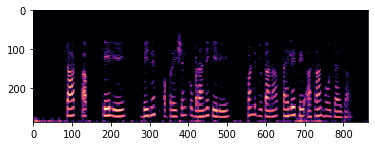

In [4]:
audio_path = 'hindi/HindiPN_3_1_3_7.wav'#sandy add the new audio path hear!!!! Simple as that;)
image_path = 'tmp.png'

y, sr = librosa.load(audio_path)

# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.core.amplitude_to_db(S, ref=np.max)#librosa.display.specshow

# Make a new figure
fig = plt.figure(figsize=(12,4))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Make the figure layout compact

#plt.show()
plt.savefig(image_path)
plt.close() 

# Read in the image_data
prediction = model.predict([prepare('tmp.png')])
print(prediction)
p=np.argmax(prediction[0])
print(CATOGRTIES[p])